 # Day 3 - Intro to Data Analysis using Pandas and Seaborn

 [Pandas](https://pandas.pydata.org/) is a widely used and very powerful python library for data analysis. Pandas is efficient, since it is built on top of NumPy, but also adds a lot of convenience layers to make analysing data more straightforward than using raw NumPy. The library can deal with a lot of widely used file formats such as csv, json, hdf5, ..., and also databases such as SQL. Pandas also interoperates cleanly with existing python libraries such as NumPy, matplotlib, or machine learning libraries such as scikit-learn.
 
 [Seaborn](https://seaborn.pydata.org/) is a data visualization library which provides functionality to create plots that would be quite involved using pure matplotlib in only a few lines of python, and it understands Pandas dataframes by default

 First, lets get some imports out of the way.

In [1]:
import numpy as np 
import matplotlib.pyplot as pl
import pandas as pd 
import seaborn as sns # This is the usual way seaborn is abbreviated. Apparently it's an inside reference to The West Wing
sns.set() # Use seaborn's settings to plot, which looks a lot nicer than the matplotlib default

Much like how the NumPy library is built around the central object of the NumPy array, Pandas is built around the central objects of the Pandas Dataframe and the Pandas Series. A Dataframe holds 2-dimensional tabular data, such as the data in a .csv file, in a python object. A Series holds 1-dimensional data, and each column of a DataFrame is a Series. There are a number of ways to create a DataFrame from data in python. One way is to construct a DataFrame from a dictionary of lists, mapping the names of each column to a list of values. Here's some not-quite-true data from the last Irish election. 

In [2]:

df = pd.DataFrame(
    {'Political_Party': ['Sinn Fein', 'Fine Gael', 'Fianna Fail', 'Greens', 'Social Democrats'] ,
     'Leader': ['Mary-Lou MacDonald', 'Leo Varadkar', 'Michael Martin', 'Eamon Ryan', 'Roisin Shortall'],
     'MPs': [38, 34, 40, 12, 7], 
     'Vote share %': [40, 10, 20, 10, 5]
   }
)
df

,Political_Party,Leader,MPs,Vote share %
0,Sinn Fein,Mary-Lou MacDonald,38,40
1,Fine Gael,Leo Varadkar,34,10
2,Fianna Fail,Michael Martin,40,20
3,Greens,Eamon Ryan,12,10
4,Social Democrats,Roisin Shortall,7,5


We can see that by default jupyter formats DataFrames to be a bit more human readable than it does with NumPy arrays. 

We can access the columns of a DataFrame as it were a dictionary:

In [3]:
print(df['Political_Party'])


0           Sinn Fein
1           Fine Gael
2         Fianna Fail
3              Greens
4    Social Democrats
Name: Political_Party, dtype: object


We can also access the columns of the DataFrame as attributes using `.`

In [4]:
print(df.Political_Party)

0           Sinn Fein
1           Fine Gael
2         Fianna Fail
3              Greens
4    Social Democrats
Name: Political_Party, dtype: object


This means that columns of DataFrame support tab completion which is really useful. Try pressing the tab key with the cursor at the end of `df.Pol` below!

In [5]:
df.Political_Party

0           Sinn Fein
1           Fine Gael
2         Fianna Fail
3              Greens
4    Social Democrats
Name: Political_Party, dtype: object

# Importing Data

A lot of the time, you would be interested in manipulating data that already exists. In this case we'd commonly read data from something like a .csv file. CSV stands for "Comma-seperated values" and is a common file format for representing columns of data, which are seperated by commas as the name implies. CSV files are human readable, and understood by Pandas, Excel and pretty much any data application. For this tutorial, we'll take advantage of the fact that seaborn has a few sample datasets which we can grab on demand without having to deal with the `.csv` file directly. 

We'll look at the Iris dataset. It is a collection of images of flowers and contains info on which species each flower is, and the width and length of its petals and sepals. This is a good dataset for us to look at since it combines numerical data (the sepal, petal widths) and categorical data (the species) which we use to demonstrate the power of pandas. 

In [6]:

iris = sns.load_dataset("iris")

 Now that we have our data loaded in python, we can start to explore the data. We can print the dataframe:

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


  The method `describe` will give us a statistical summary of the data.

In [12]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 `Count` just tells us how many times each field appears, which is 150 for each field here. Some datasets will have missing data, which are represented by 'NaN' (Not a Number) in which case `count` will not be the same for each field. The rest of the rows give a statistical summary.

 The head method shows the first few rows of the dataframe

In [13]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 DataFrames behave like dicts, and we can access each column by its name.

In [14]:
iris['species']


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

If we have categorical data and want to see only the unique values, there's a few things we can do:

In [15]:
print(np.unique(iris['species']))

# or 
print(set(iris['species']))

# or, to also get the count
from collections import Counter
print(Counter(iris['species']))

['setosa' 'versicolor' 'virginica']
{'setosa', 'virginica', 'versicolor'}
Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})


We can also access multiple columns by passing a list of names. This will return a DataFrame

In [16]:
iris[['species', 'sepal_width']]

,species,sepal_width
0,setosa,3.5
1,setosa,3.0
2,setosa,3.2
3,setosa,3.1
4,setosa,3.6
...,...,...
145,virginica,3.0
146,virginica,2.5
147,virginica,3.0
148,virginica,3.4




 We can also use the index to access the rows using the `loc` method. (Note that indexing with loc *includes* the endpoint of the range)

In [17]:
iris.loc[0:4]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 We can do much fancier indexing than just by the index value. As we saw when we called `.describe` above, the petal_width varied from 0.1 to 2.5. Let's say we're only interested in parts of the data where the sepal_width is less than 1.5. Pandas' powerful boolean indexing features let us index by a boolean. We assign the result to a new DataFrame

In [18]:
iris_small_flowers = iris[iris['petal_width'] < 1.5]
iris_small_flowers


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


  Math using the columns of dataframes is vectorized, in that math operations get applied to every entry in a column

In [19]:
petal_area = iris['petal_width'] * iris['petal_length']
petal_area

0       0.28
1       0.28
2       0.26
3       0.30
4       0.28
       ...  
145    11.96
146     9.50
147    10.40
148    12.42
149     9.18
Length: 150, dtype: float64

 We can also add data to a DataFrame. New columns by default get appended to the end.

In [20]:
iris['petal_area'] = petal_area
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96
146,6.3,2.5,5.0,1.9,virginica,9.50
147,6.5,3.0,5.2,2.0,virginica,10.40
148,6.2,3.4,5.4,2.3,virginica,12.42


# Saving data

One strength of pandas is that a DataFrame can easily be loaded to and from a lot of different types of data formats, .csv, .hdf5, excel files, SQL database, ... very straightforwardly using `to_*` and `from_*` methods. 

In [21]:
iris.to_csv("iris.csv")

In [22]:
!cat iris.csv #Print out the contents of the file iris.csv

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.27999999999999997
1,4.9,3.0,1.4,0.2,setosa,0.27999999999999997
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30000000000000004
4,5.0,3.6,1.4,0.2,setosa,0.27999999999999997
5,5.4,3.9,1.7,0.4,setosa,0.68
6,4.6,3.4,1.4,0.3,setosa,0.42
7,5.0,3.4,1.5,0.2,setosa,0.30000000000000004
8,4.4,2.9,1.4,0.2,setosa,0.27999999999999997
9,4.9,3.1,1.5,0.1,setosa,0.15000000000000002
10,5.4,3.7,1.5,0.2,setosa,0.30000000000000004
11,4.8,3.4,1.6,0.2,setosa,0.32000000000000006
12,4.8,3.0,1.4,0.1,setosa,0.13999999999999999
13,4.3,3.0,1.1,0.1,setosa,0.11000000000000001
14,5.8,4.0,1.2,0.2,setosa,0.24
15,5.7,4.4,1.5,0.4,setosa,0.6000000000000001
16,5.4,3.9,1.3,0.4,setosa,0.52
17,5.1,3.5,1.4,0.3,setosa,0.42
18,5.7,3.8,1.7,0.3,setosa,0.51
19,5.1,3.8,1.5,0.3,setosa,0.44999999999999996
20,5.4,3.4,1.7,0.2,setosa,0.34
21,5.1,3.7,1.5,0.4,setosa,0.6000000000000001
22,4.6,3.6,1.0,0.2,setosa,0.2
23,5.1,3.3,1.7,0.5,s

In [23]:
new_iris = pd.read_csv("iris.csv", index_col=0)
new_iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96
146,6.3,2.5,5.0,1.9,virginica,9.50
147,6.5,3.0,5.2,2.0,virginica,10.40
148,6.2,3.4,5.4,2.3,virginica,12.42


# Task 1
 Add a new column to the iris data set representing the petal 'aspect_ratio', it's length divided by its width. 
 
 Also, using the boolean index feature, produce a DataFrame which only has data for the virginica species. Call `.describe()` on the result. 

In [24]:
iris['aspect_ratio'] = iris['petal_length'] / iris['petal_width']

In [26]:
virginica = iris[iris.species == 'virginica']
virginica

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,aspect_ratio
100,6.3,3.3,6.0,2.5,virginica,15.00,2.400000
101,5.8,2.7,5.1,1.9,virginica,9.69,2.684211
102,7.1,3.0,5.9,2.1,virginica,12.39,2.809524
103,6.3,2.9,5.6,1.8,virginica,10.08,3.111111
104,6.5,3.0,5.8,2.2,virginica,12.76,2.636364
105,7.6,3.0,6.6,2.1,virginica,13.86,3.142857
106,4.9,2.5,4.5,1.7,virginica,7.65,2.647059
107,7.3,2.9,6.3,1.8,virginica,11.34,3.500000
108,6.7,2.5,5.8,1.8,virginica,10.44,3.222222
109,7.2,3.6,6.1,2.5,virginica,15.25,2.440000


 # Plotting.
 
 If we're trying to analyse data, we usually want to do a bit more than just see standard deviations and means. Pandas offers a thin wrapper around matplotlib to allow us to easily do simple plots to explore our data. Note that everything we do here can be done directly with matplotlib.

 Perhaps we expect their to be a correlation between sepal length and petal length, we can do a scatter plot.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


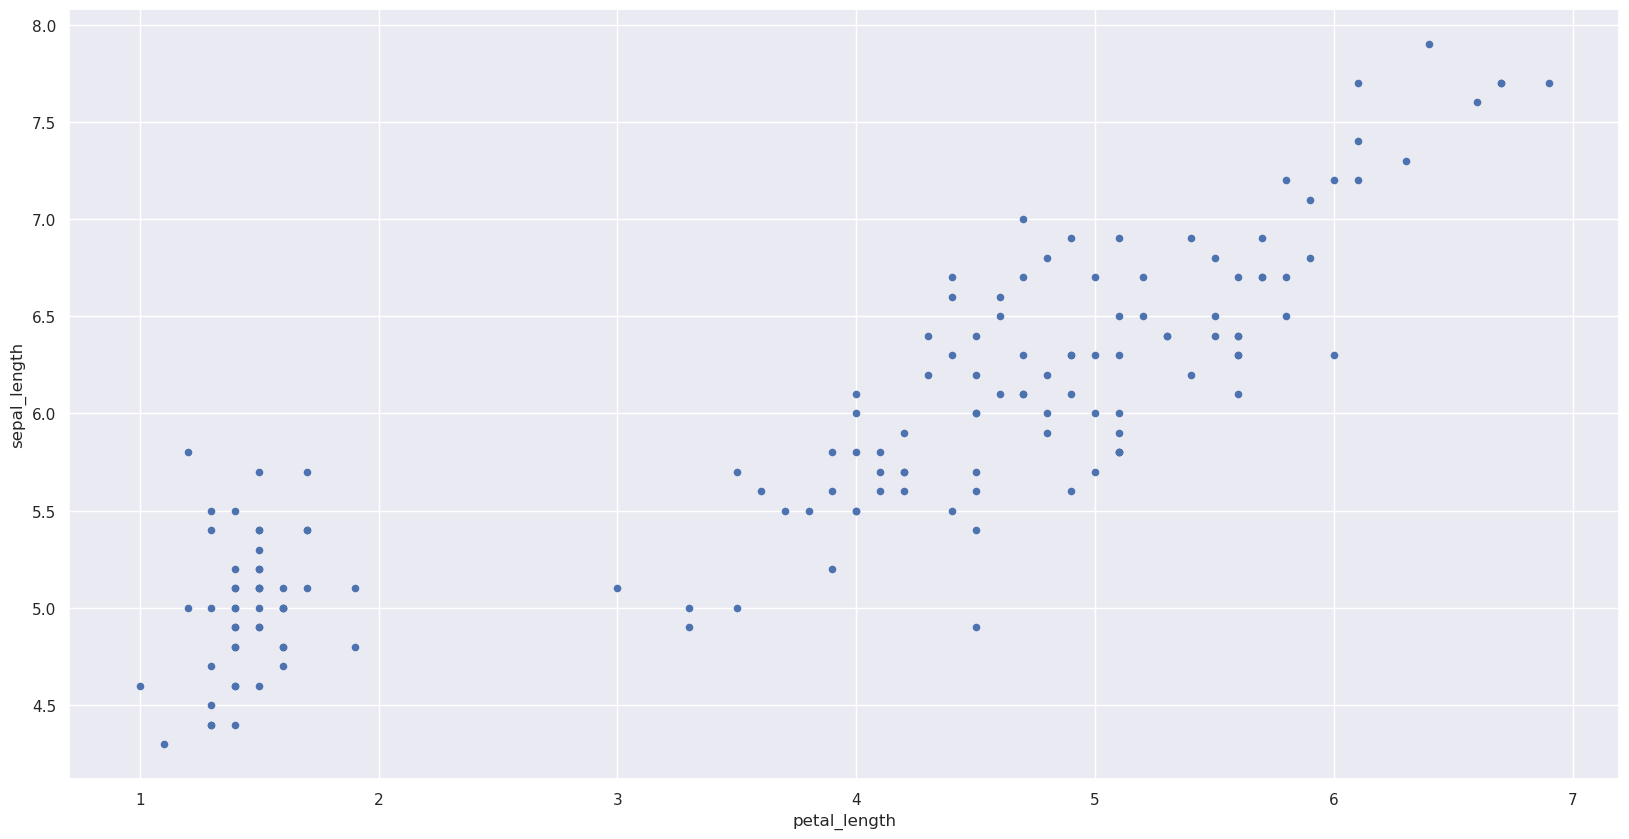

In [27]:
iris.plot.scatter(x='petal_length', y='sepal_length')

We can also color the dots by the value in a different column by specifying `c=`. 

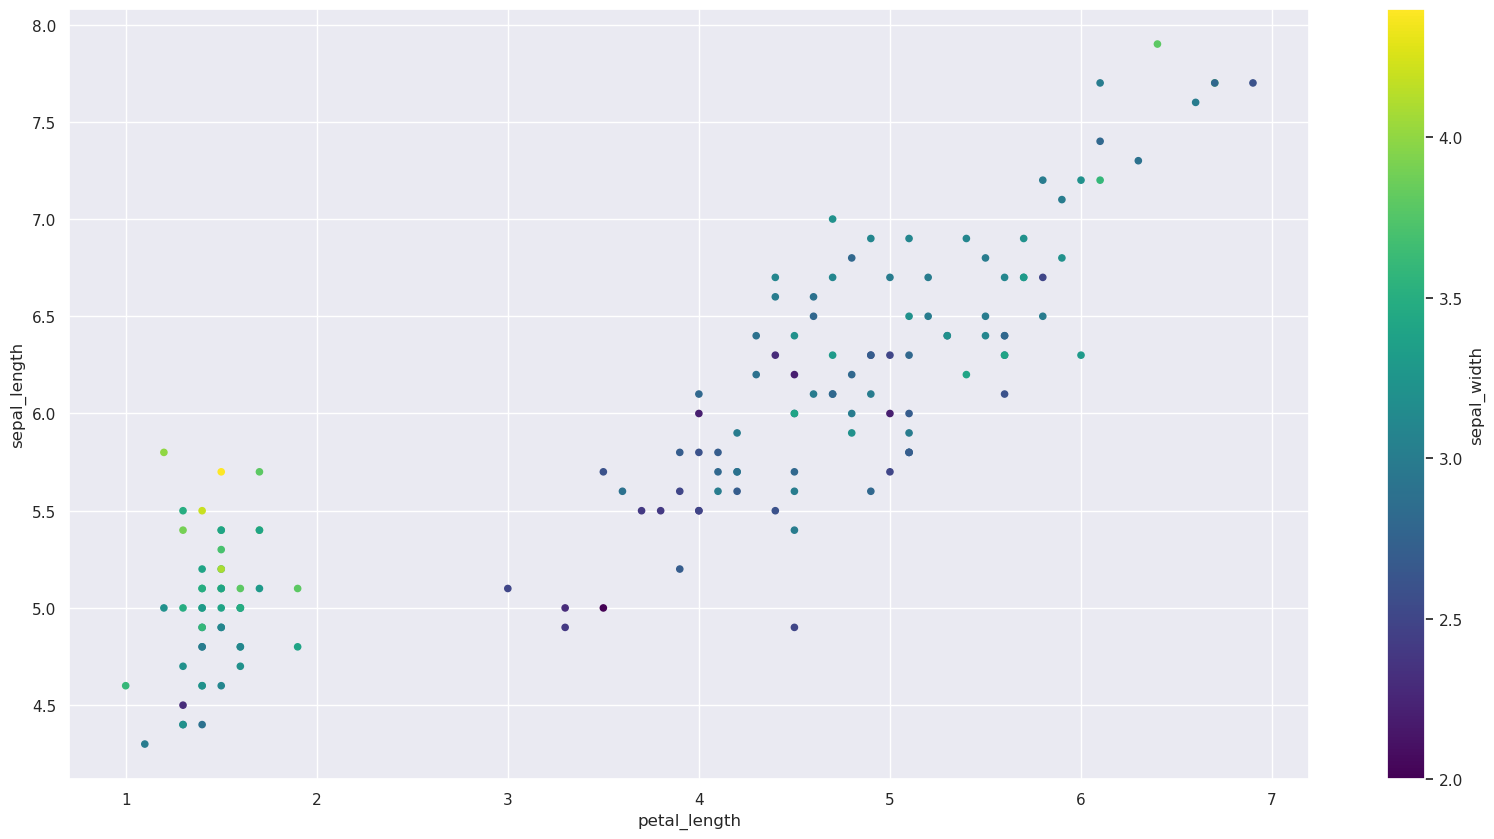

In [28]:
iris.plot.scatter('petal_length', 'sepal_length', c='sepal_width', cmap='viridis')

 One of the nice things about using the Pandas plotting interface is certain things, such as the axes being labeled by the column name is done automatically. 
 
We might also want to plot a histogram of a single column. We then call `plot` on the Series object.

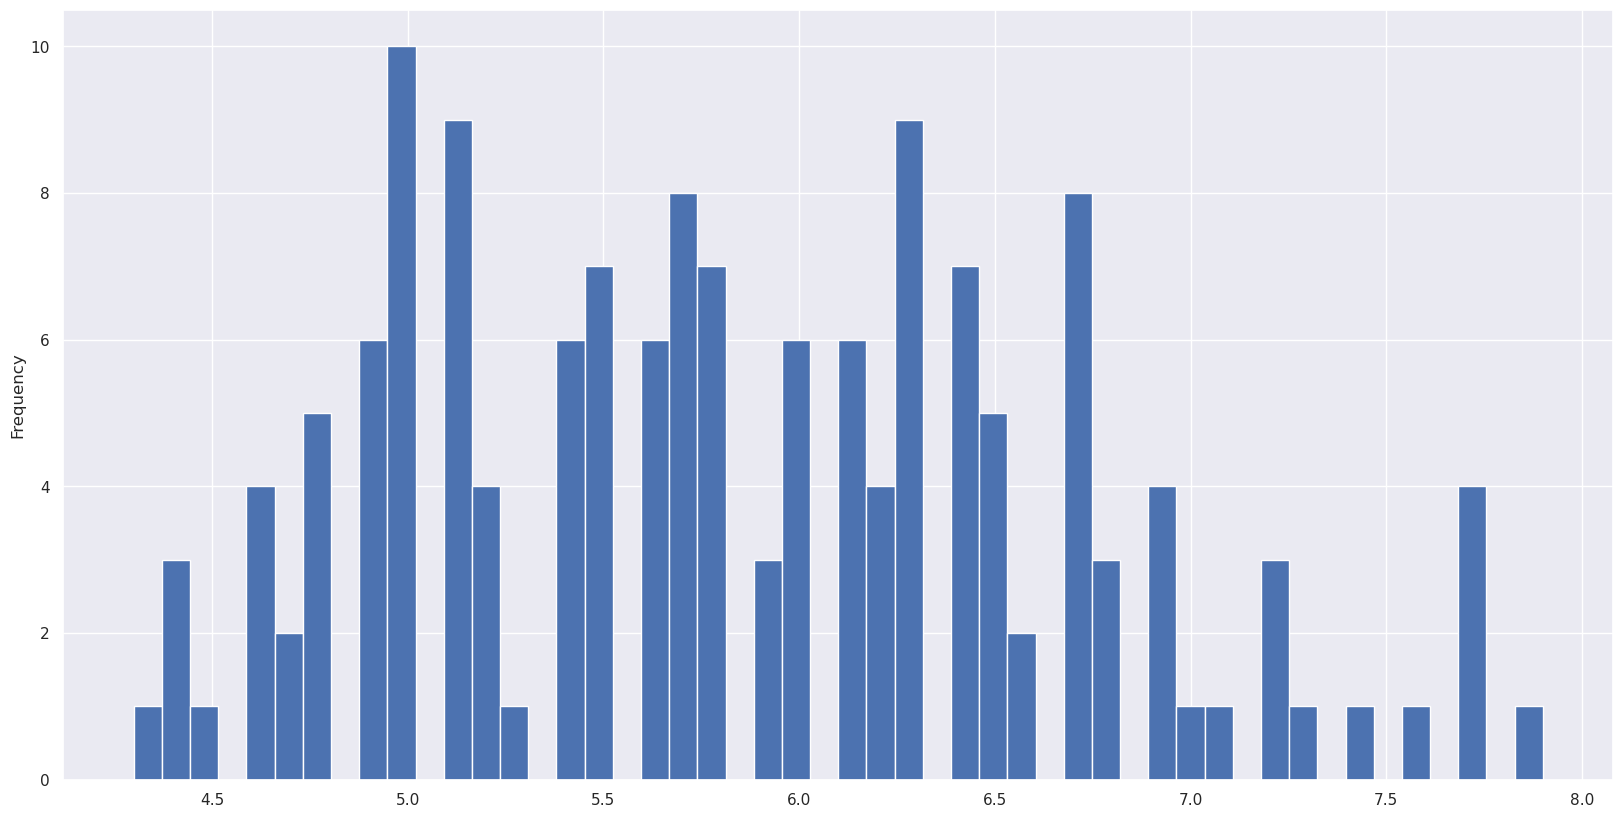

In [29]:

iris['sepal_length'].plot.hist(bins=50)


In fact, if we just call `.hist` directly Pandas will generate all of the histograms for whatever columns the data is numerical.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bf13d3590>,
      dtype=object)

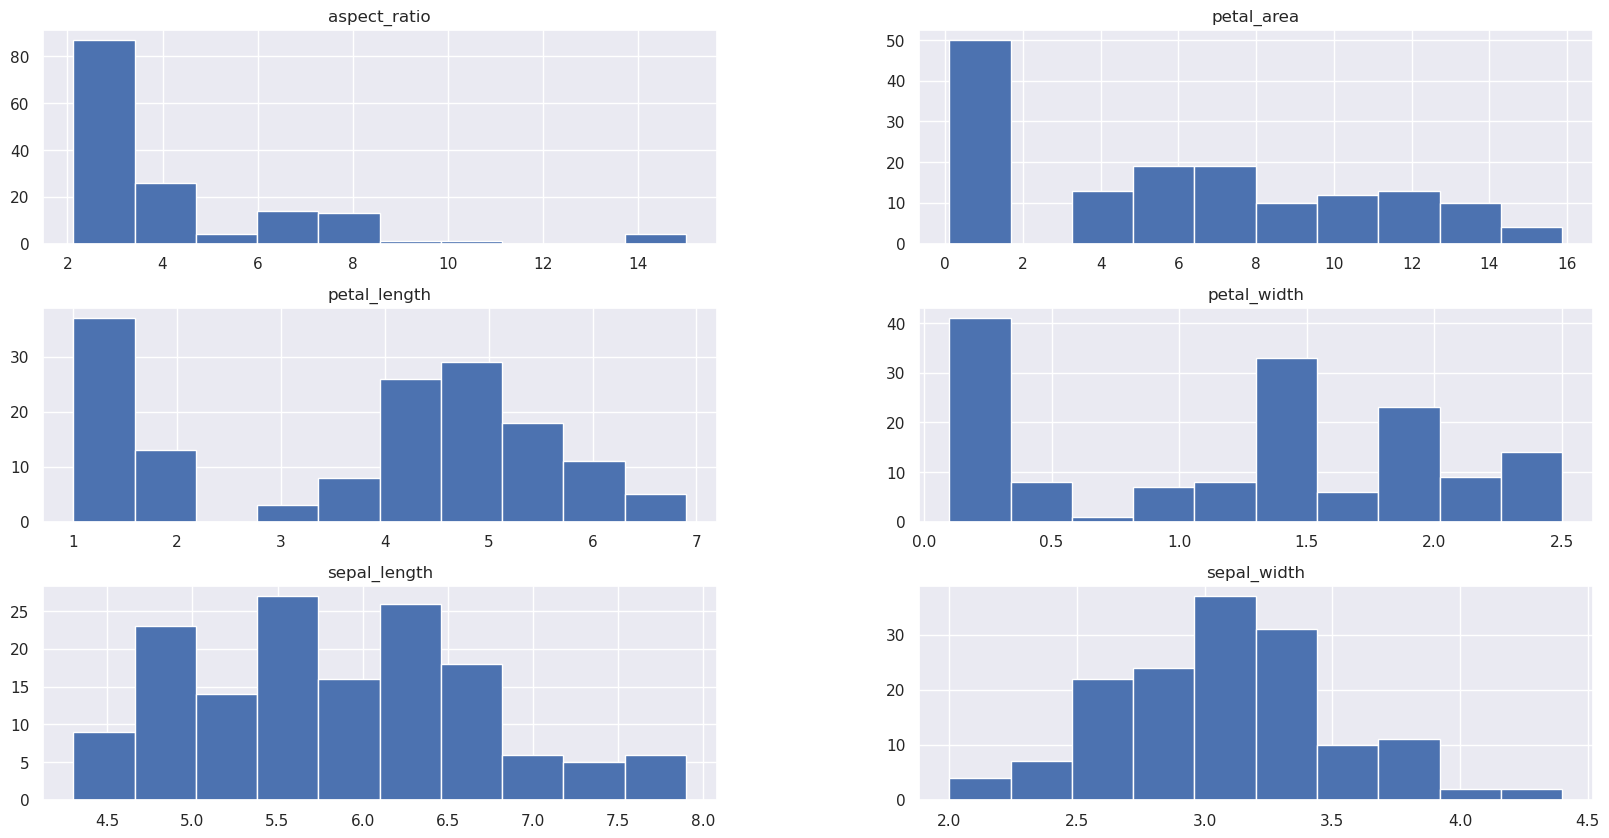

In [30]:
iris.hist()

# Task: 
Let's explore some of the other plotting functionality in pandas. 

In [31]:
[i for i in dir(iris.plot) if not i.startswith('_')]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

Try plotting iris using box plot. This plot shows the min, max, mean, 25, 50, and 75 quartiles along with outliers in a single plot. 

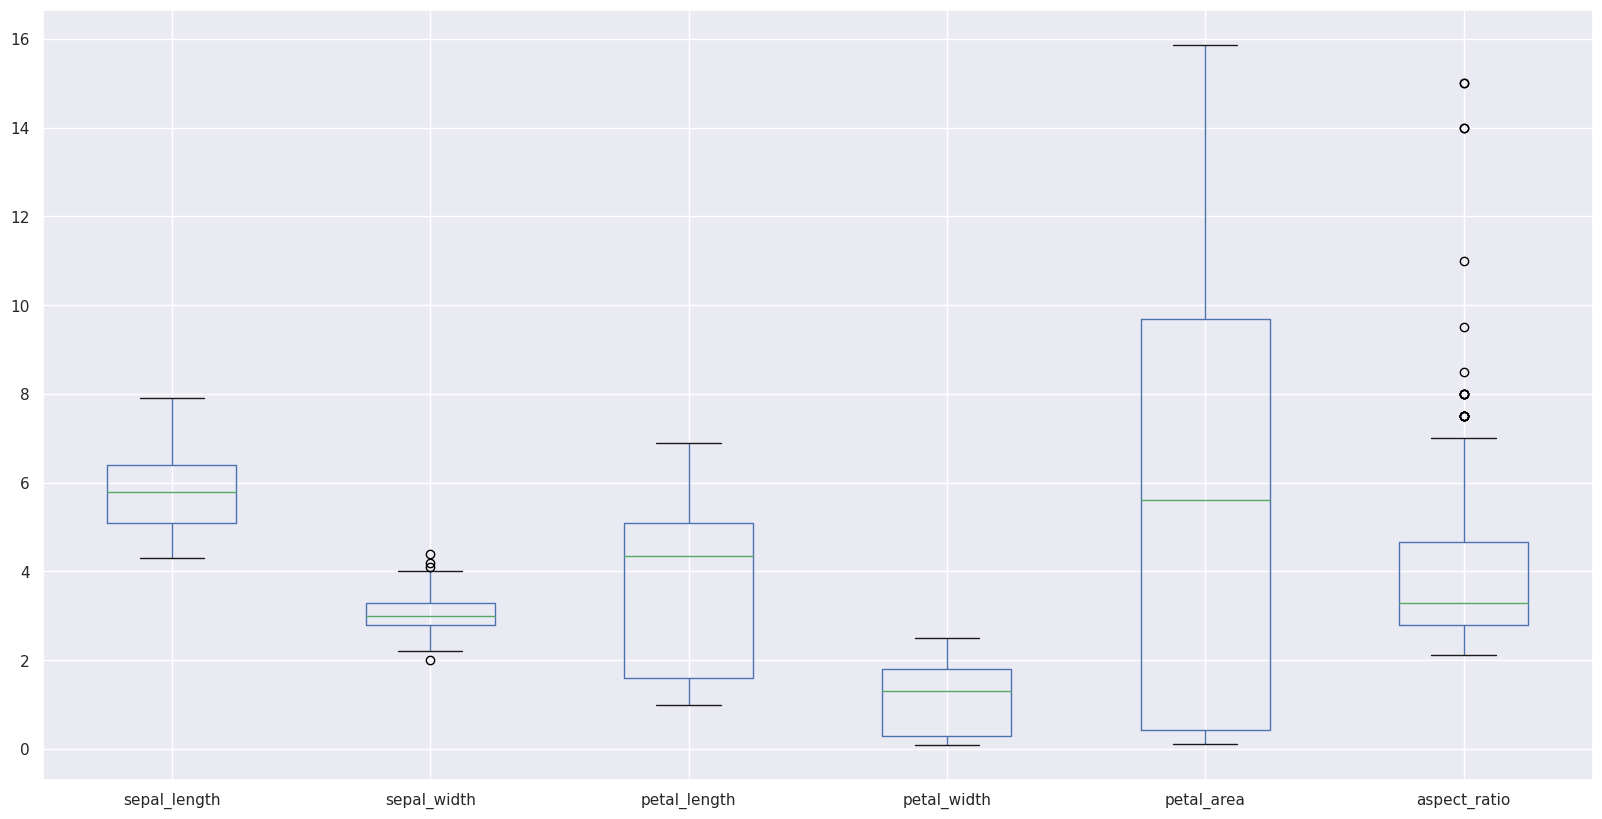

In [32]:
iris.plot.box()

Now try a scatter plot of 'petal_width' and 'petal_length', but instead of coloring each point based on the 'sepal_width', change the size of the point based on the value of 'sepal_width' using the `s=` option. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


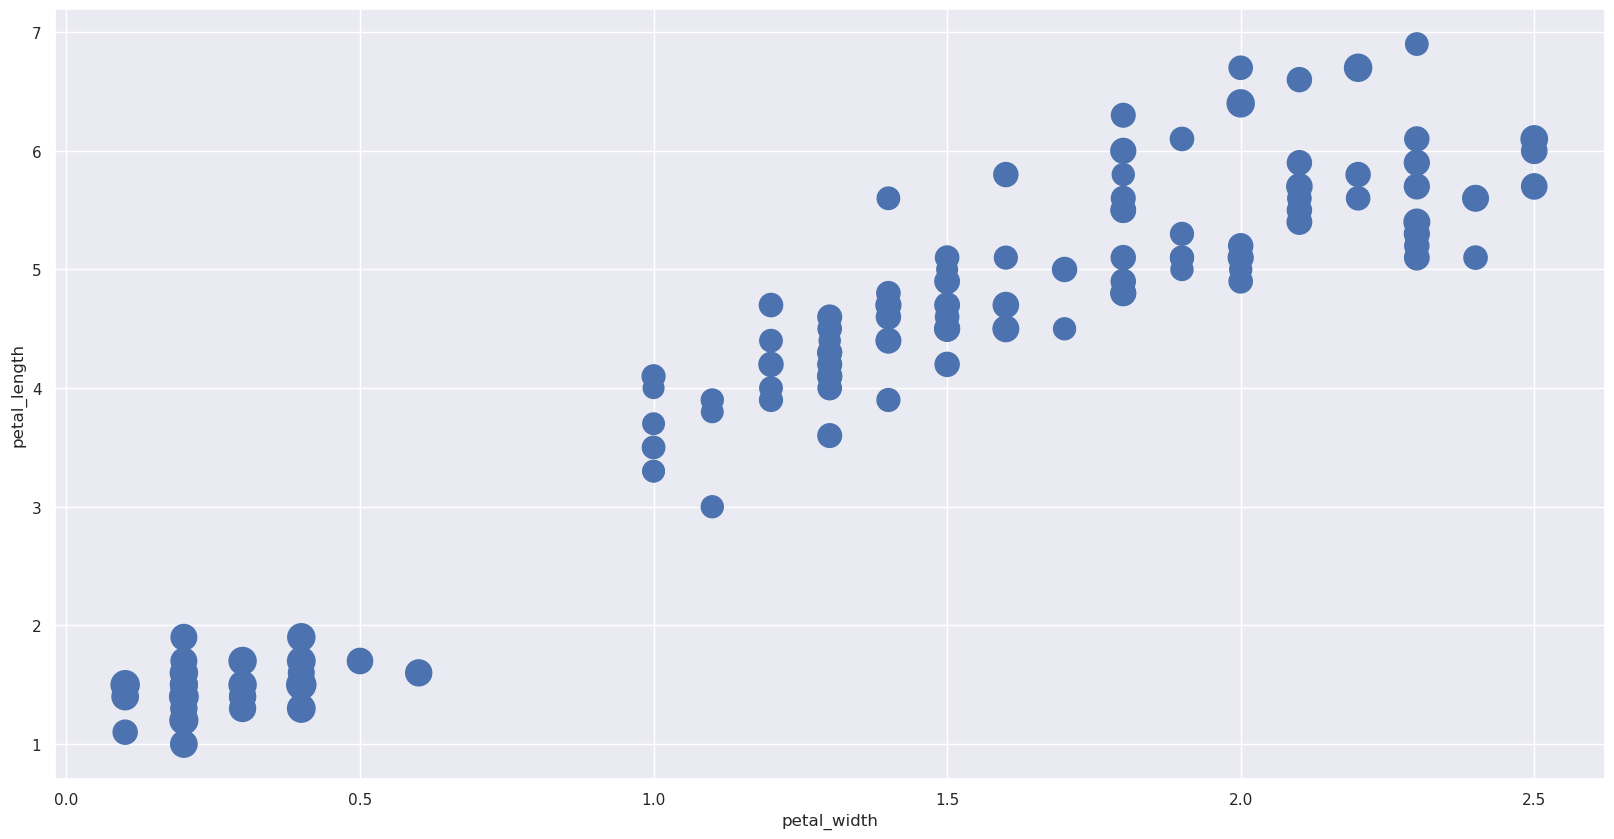

In [33]:
iris.plot.scatter('petal_width', 'petal_length', s=iris['sepal_width']*100)

## Groupby

 If you look at our initial scatter plot, you might start to think we're not 
 analysing our data as we should. Notice that there is a cluster of values in the bottom 
 left. This is because our data is categorical; one should expect that the different species
 have different characteristic petal and sepal sizes, and we'd like our plots to show that 
 distinction. 



Pandas let's us easily group data using the `groupby` method. So let's go ahead and group our data by species so we can more usefully analyse it. 

In [34]:
g = iris.groupby('species')

This returns a `GroupBy` object which we must do some operation on to get useful data. We can get statistics easily: 

In [35]:
g.count()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,aspect_ratio
species,,,,,,
setosa,50,50,50,50,50,50
versicolor,50,50,50,50,50,50
virginica,50,50,50,50,50,50


In [36]:
g.mean()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,aspect_ratio
species,,,,,,
setosa,5.006,3.428,1.462,0.246,0.3656,6.908000
versicolor,5.936,2.770,4.260,1.326,5.7204,3.242837
virginica,6.588,2.974,5.552,2.026,11.2962,2.780662


In [37]:
g.std()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,aspect_ratio
species,,,,,,
setosa,0.352490,0.379064,0.173664,0.105386,0.181155,2.854545
versicolor,0.516171,0.313798,0.469911,0.197753,1.368403,0.312456
virginica,0.635880,0.322497,0.551895,0.274650,2.157412,0.407367


We can see that we're now getting means and standard deviations within each group. 

If we wanted to we could iterate over `g` to get the three DataFrames

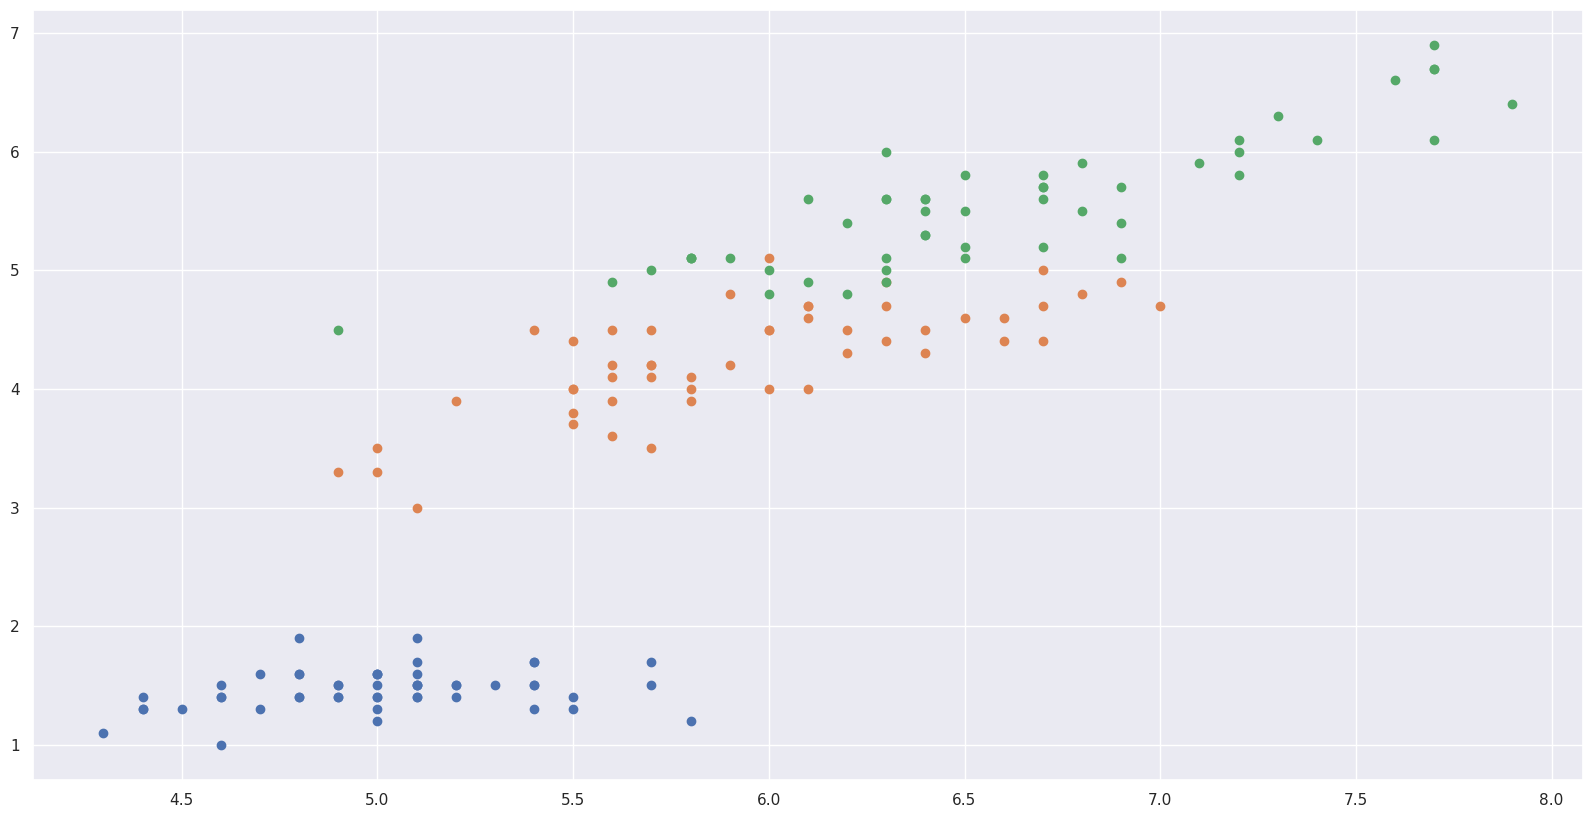

In [38]:
import matplotlib.pyplot as plt
for species, subdf in g: 
    plt.scatter(subdf['sepal_length'], subdf['petal_length'], label=species)

Now we're starting to see that the clustering is indeed due to the seperate species. 

If we wanted the scatter plots to be seperate, we could have just called plot on the `GroupBy` object `g` itself. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


species
setosa        AxesSubplot(0.125,0.11;0.775x0.77)
versicolor    AxesSubplot(0.125,0.11;0.775x0.77)
virginica     AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

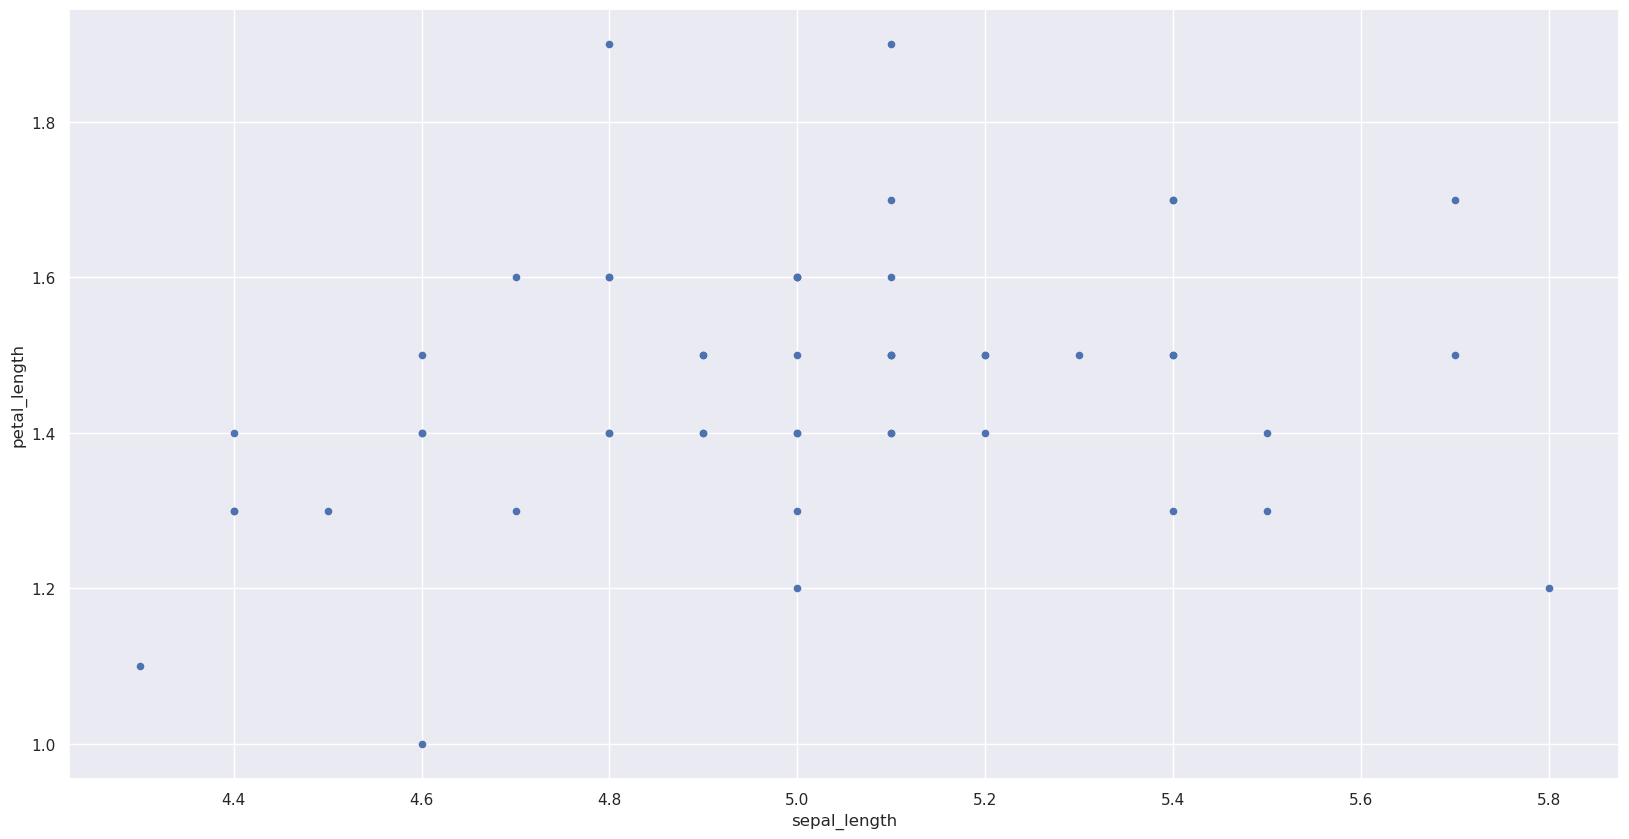

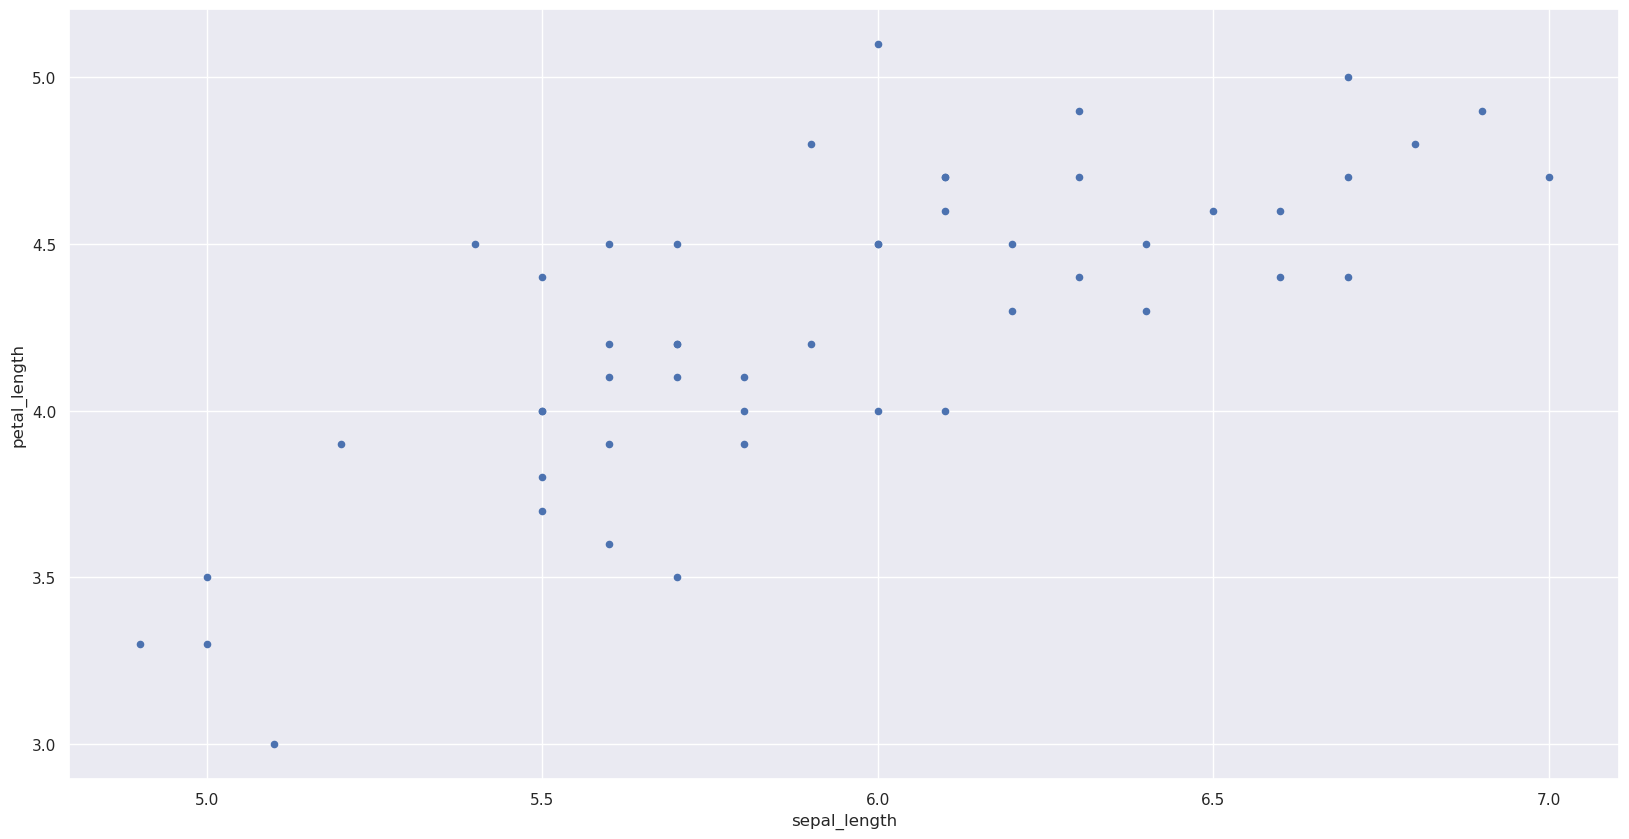

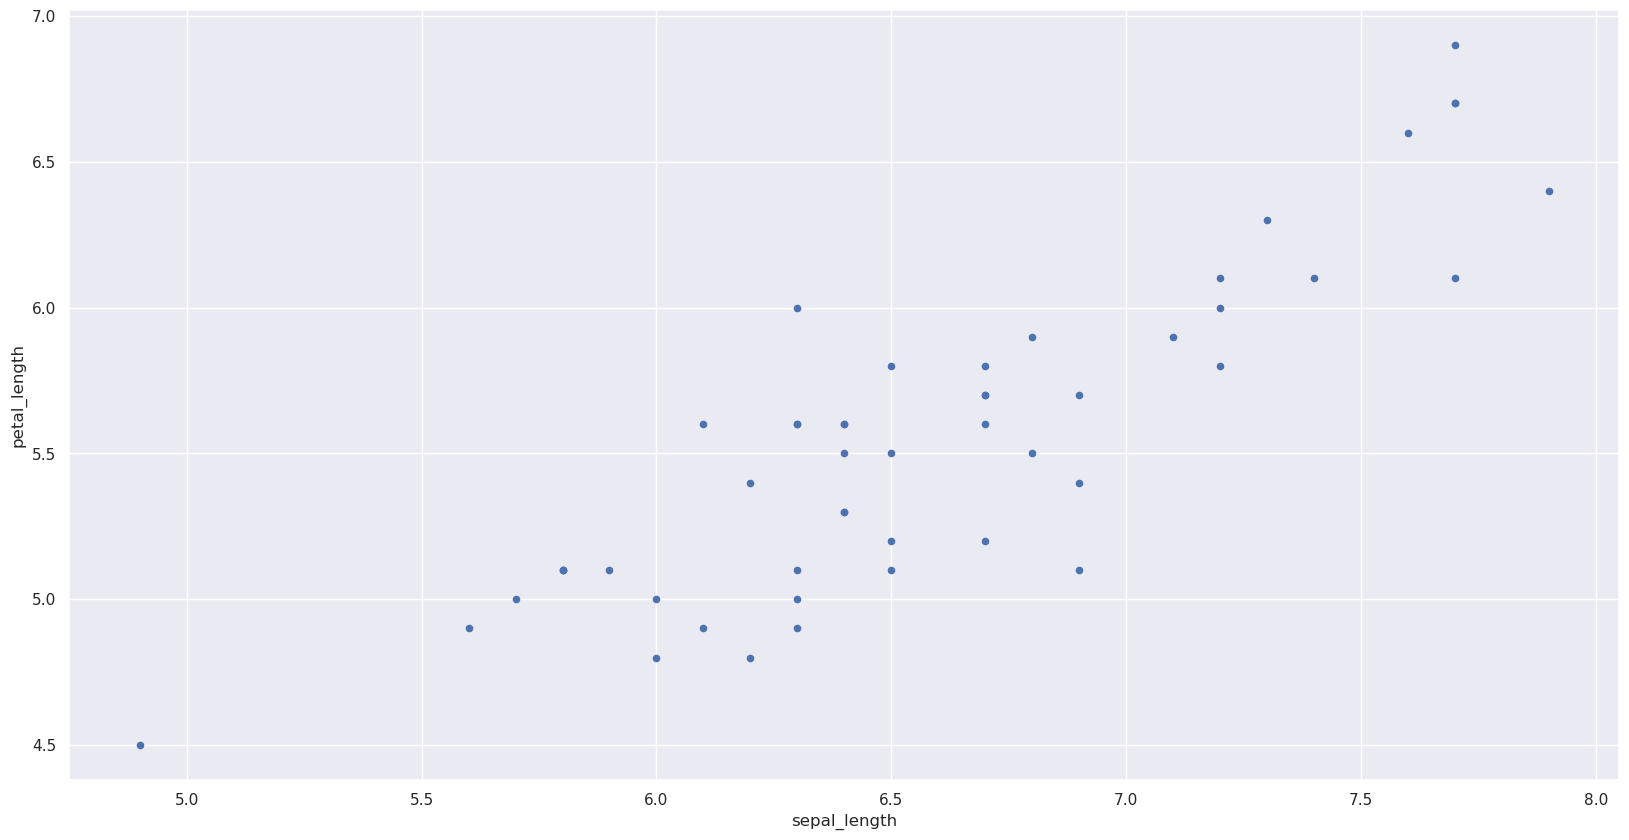

In [39]:
g.plot.scatter('sepal_length', 'petal_length')

This will work for any type of plot.

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

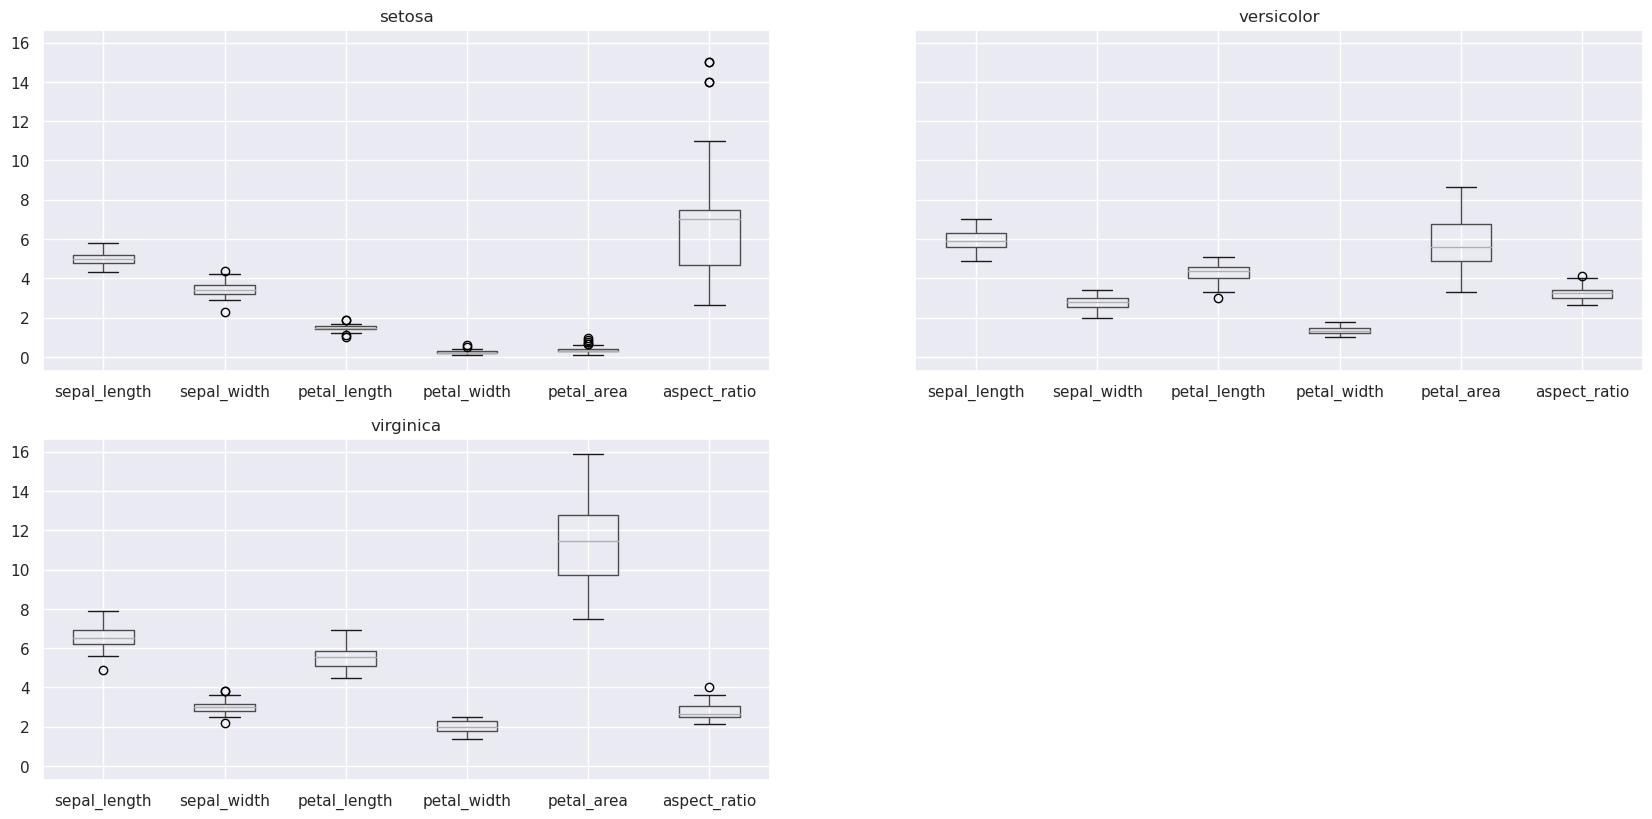

In [40]:
g.boxplot()

# Seaborn functionality. 

Let's finally just look at some seaborn functionality to make our plots even nicer. Seaborn uses slightly different names for the plotting functions but we can do things much more easily with it. 

Seaborn's plot is called `.relplot` which stands for 'relationship plot' and a few more options we can avail of to produce a more useful plot with one function call. By default it uses a scatter plot, but we could switch to line plot with `kind='line'` if it was appropriate. 

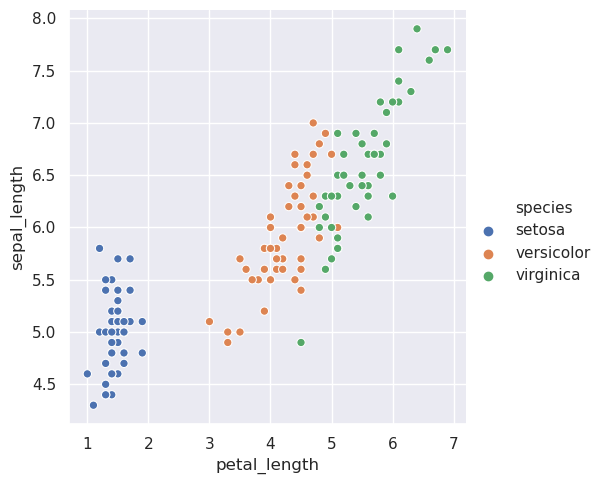

In [41]:
sns.relplot(x='petal_length', y='sepal_length', hue='species', data=iris)

We acheived the colouring which we have to use `groupby` with a for loop to get in one call thanks to the `hue` option!

We can easily find and plot a line of best fit using `lmplot`. 

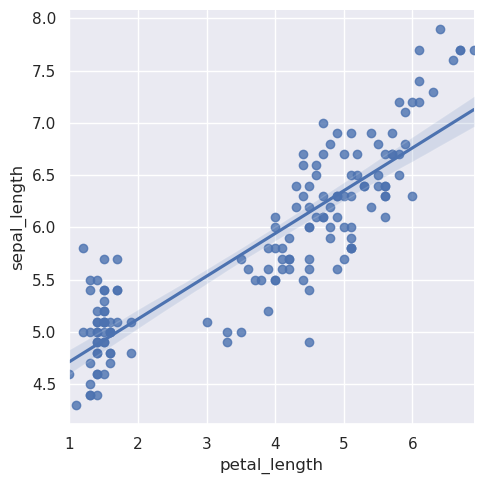

In [42]:
sns.lmplot(x='petal_length', y='sepal_length', data=iris)

`.distplot` will plot a histogram. It will also plot a 'kernel destiny estimator' which is a smoothed approximation to the data. 

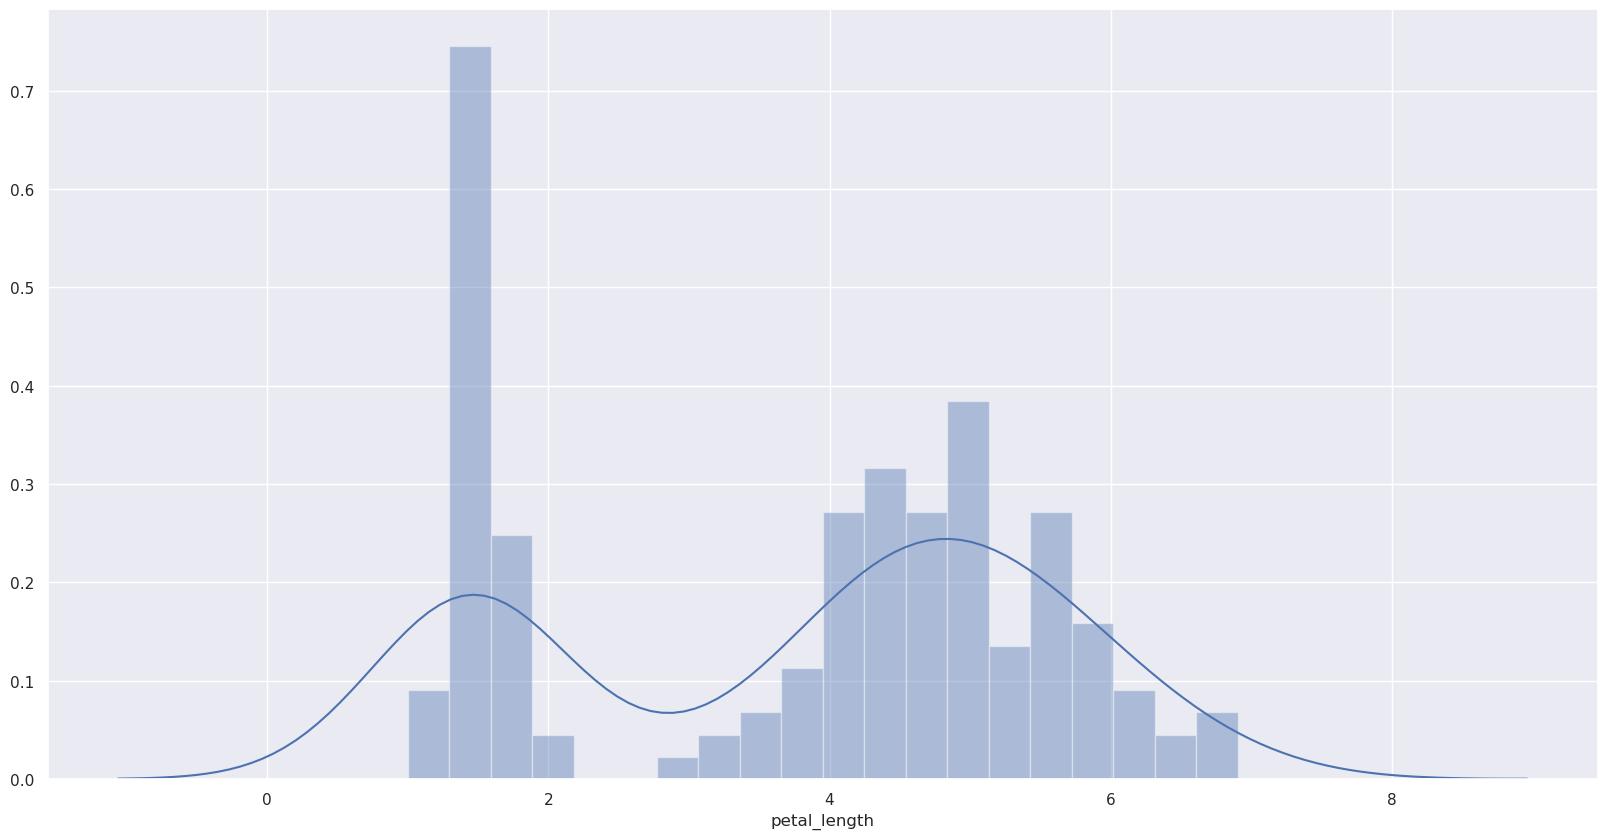

In [43]:
sns.distplot(iris.petal_length, bins=20)

Seaborn has easy functions to combine scatter plots and histograms onto one figure. 

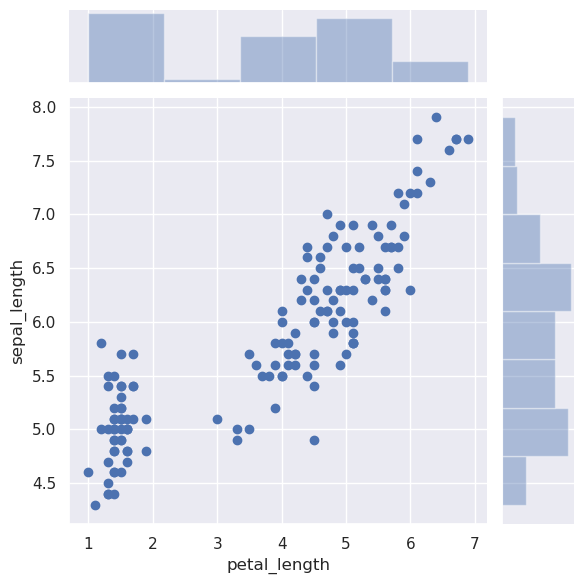

In [44]:
sns.jointplot(x='petal_length', y='sepal_length', data=iris)

Or even get this info for the whole dataset in one go. 

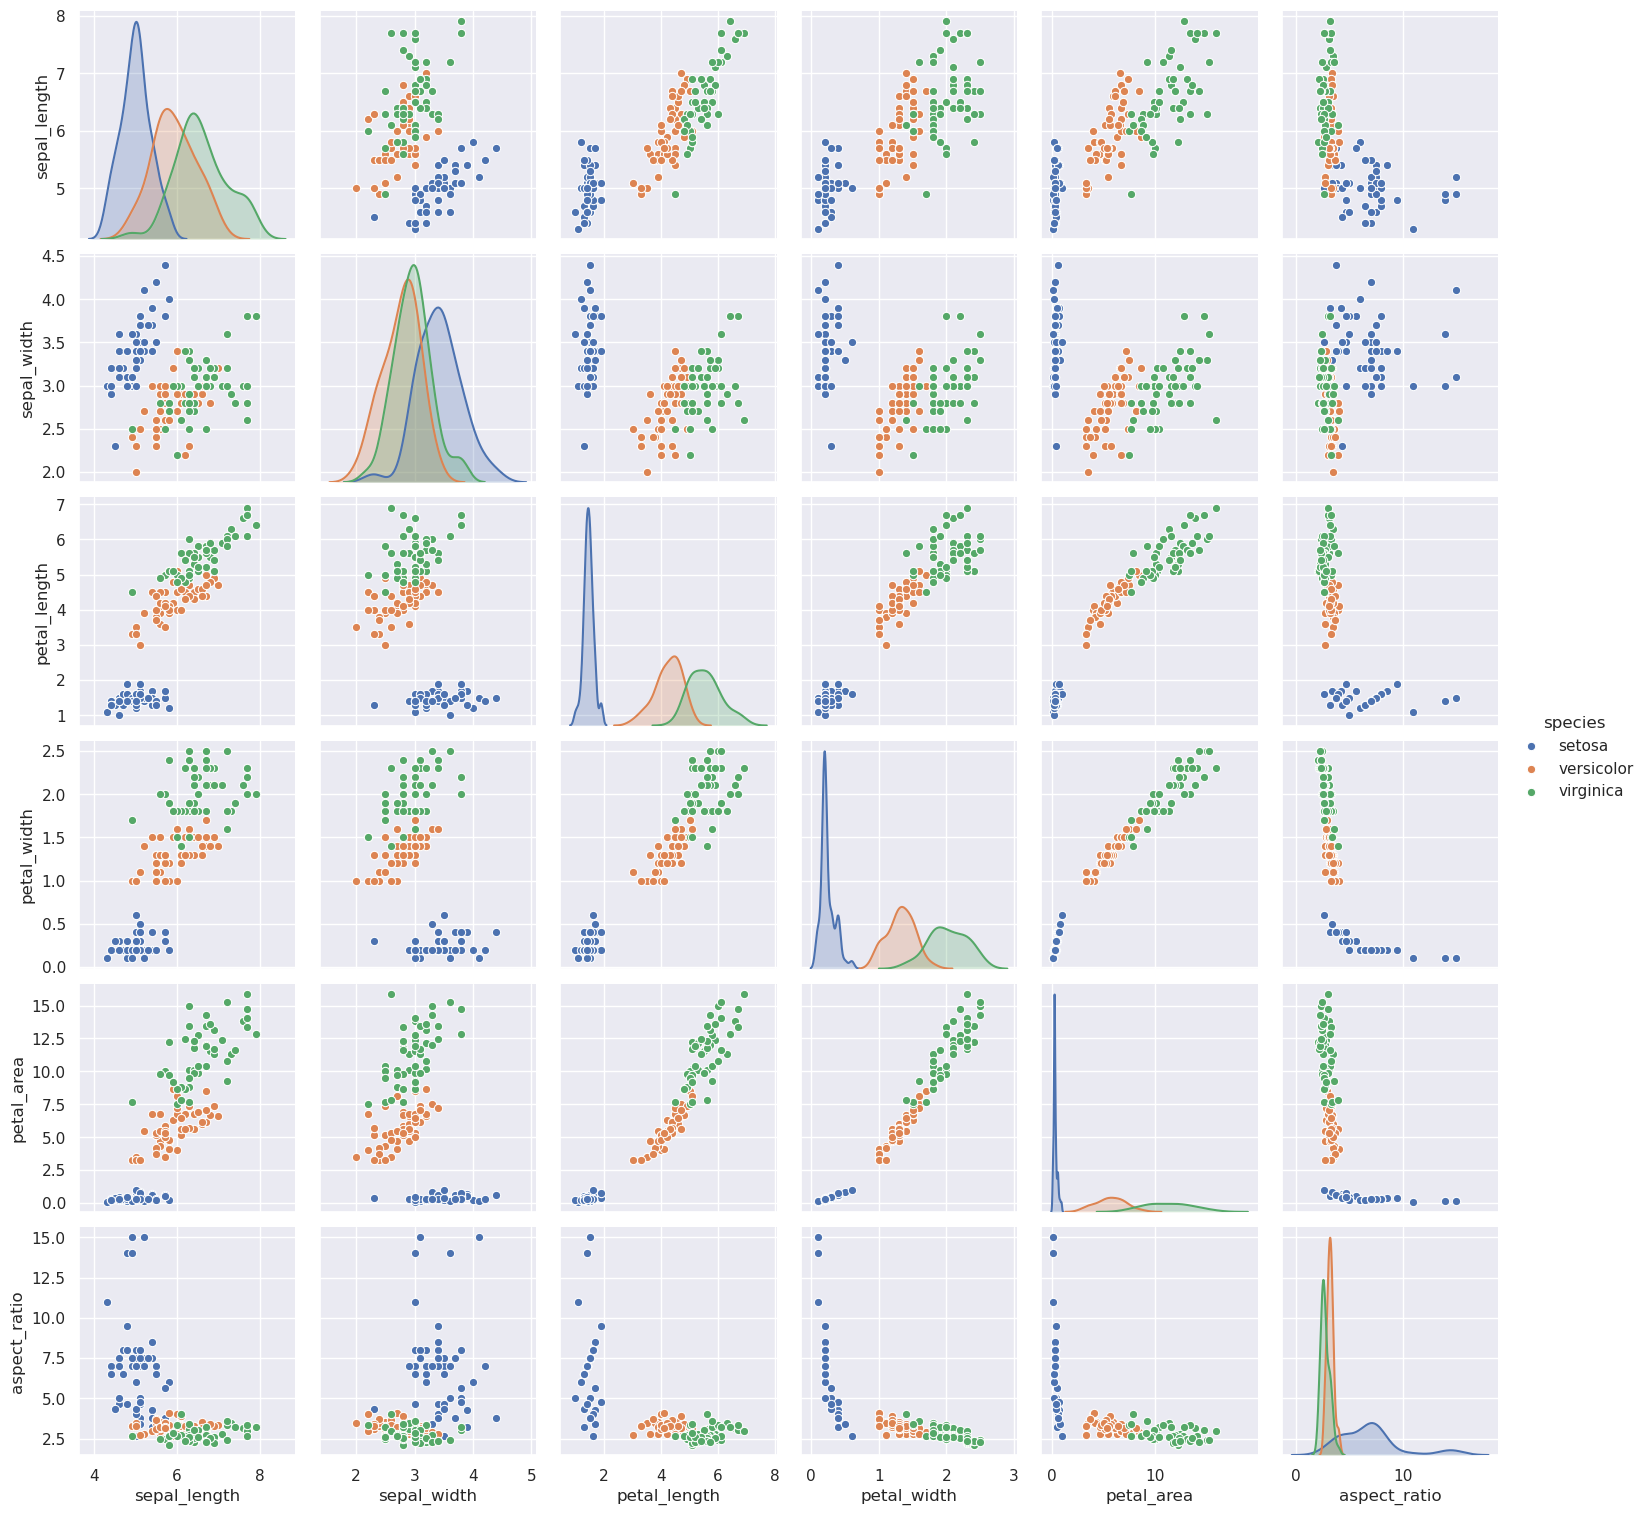

In [45]:
sns.pairplot(data=iris, hue='species')

This is only a cursory overview of what seaborn and pandas can do. Hopefully I've convinced you that if you have data, then pandas and seaborn can save you a lot of trouble in analysing it and plotting it. 

# Task 

We've looked at the iris dataset, but lets look at a different dataset and do some exploratory analysis on it. 

In [46]:
sns.get_dataset_names() # this is all of the available datasets in seaborn

/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

Planets is a dataset of exoplanets we found, perfect for us! Do some exploration of the dataset, printing, using `.describe()`, `.head()` etc. Which columns are categorical? Which are numeric? Is there any missing data (represented by NaN)?

Some things you might interested in observing: 
- Plot a histogram of the year of discovery to see how many more planets we find now. 
- Try a box plot comparing the distance and method. 
- Try an sns.pairplot (You may need 'dropna=True' for it to handle the NaN's)
- Try to group the data by 'method' and call count. Which method has found the most planets? Which methods do or do not provide mass estimate? 

The goal of pandas and seaborn is to explore, so try different things yourself!

In [8]:
planets = sns.load_dataset('planets')

In [9]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [10]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/eamonn/anaconda3/envs/lalenv/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, Use

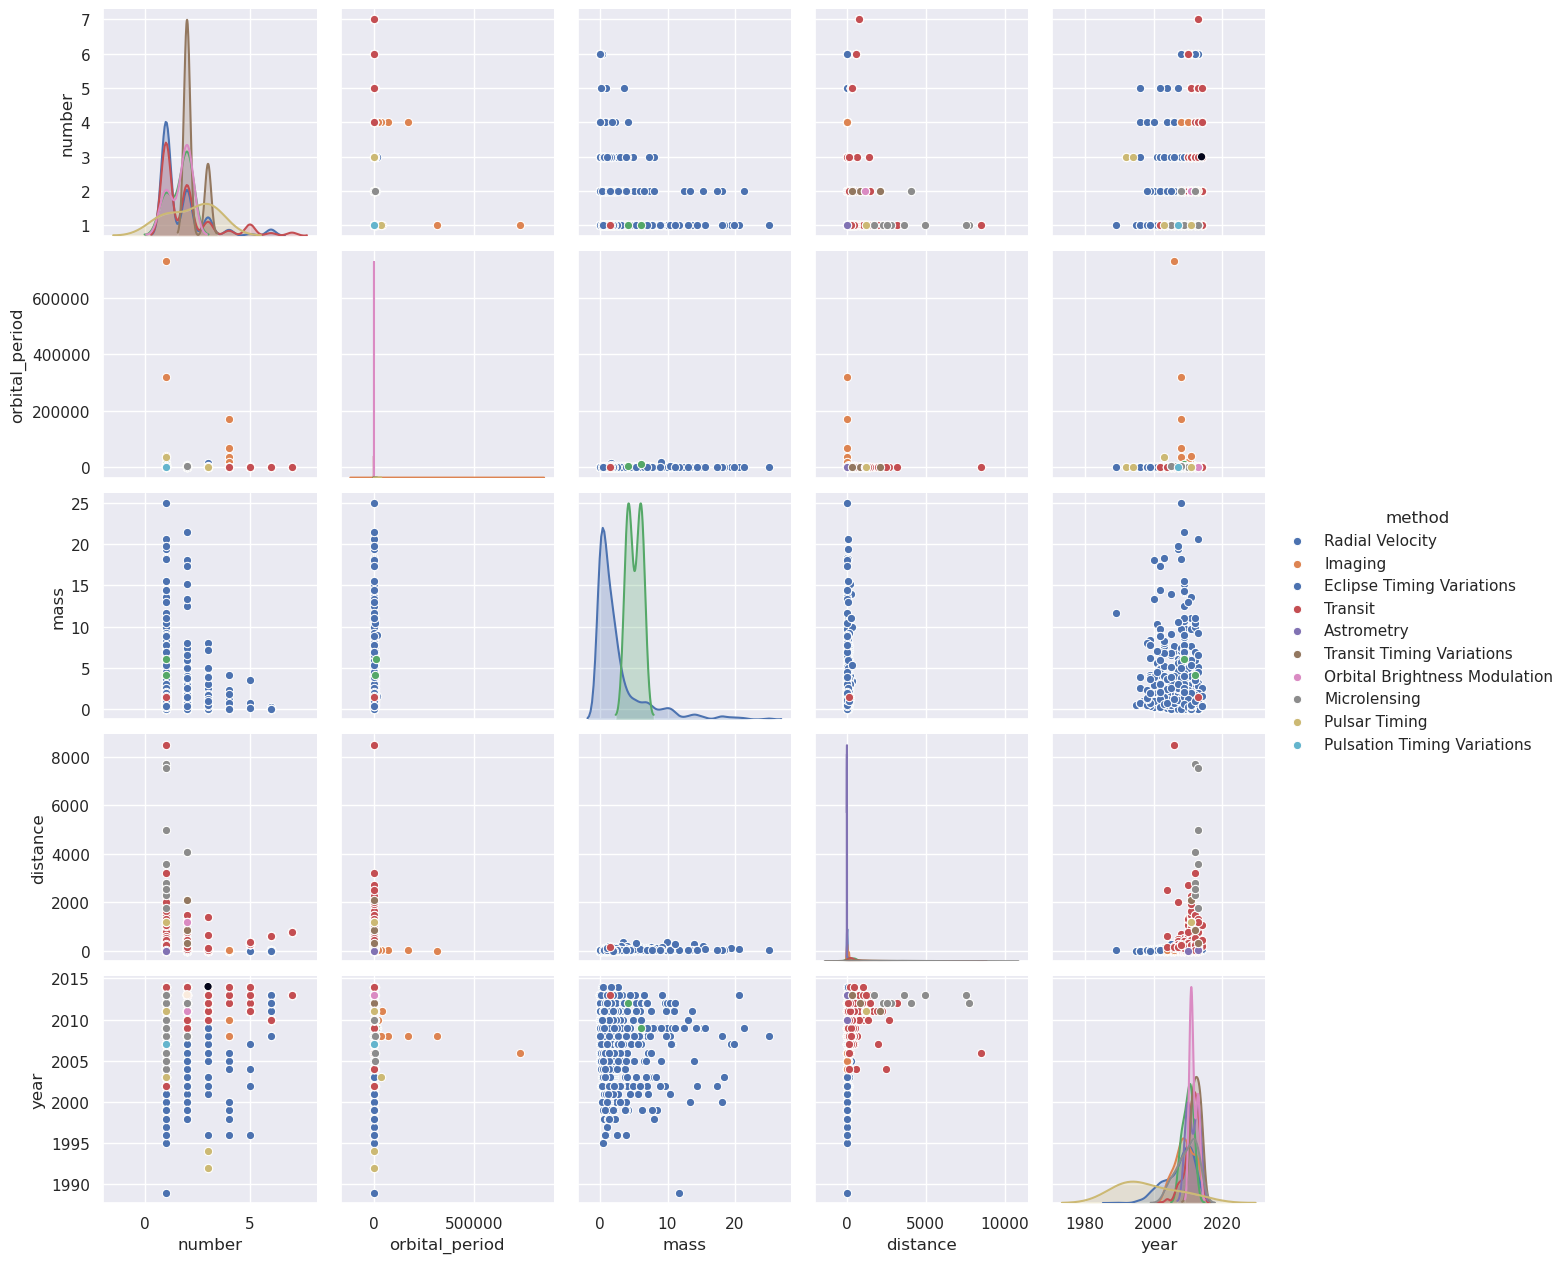

In [11]:
sns.pairplot(planets, hue='method', dropna=True)

In [12]:
planets.groupby('method').count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


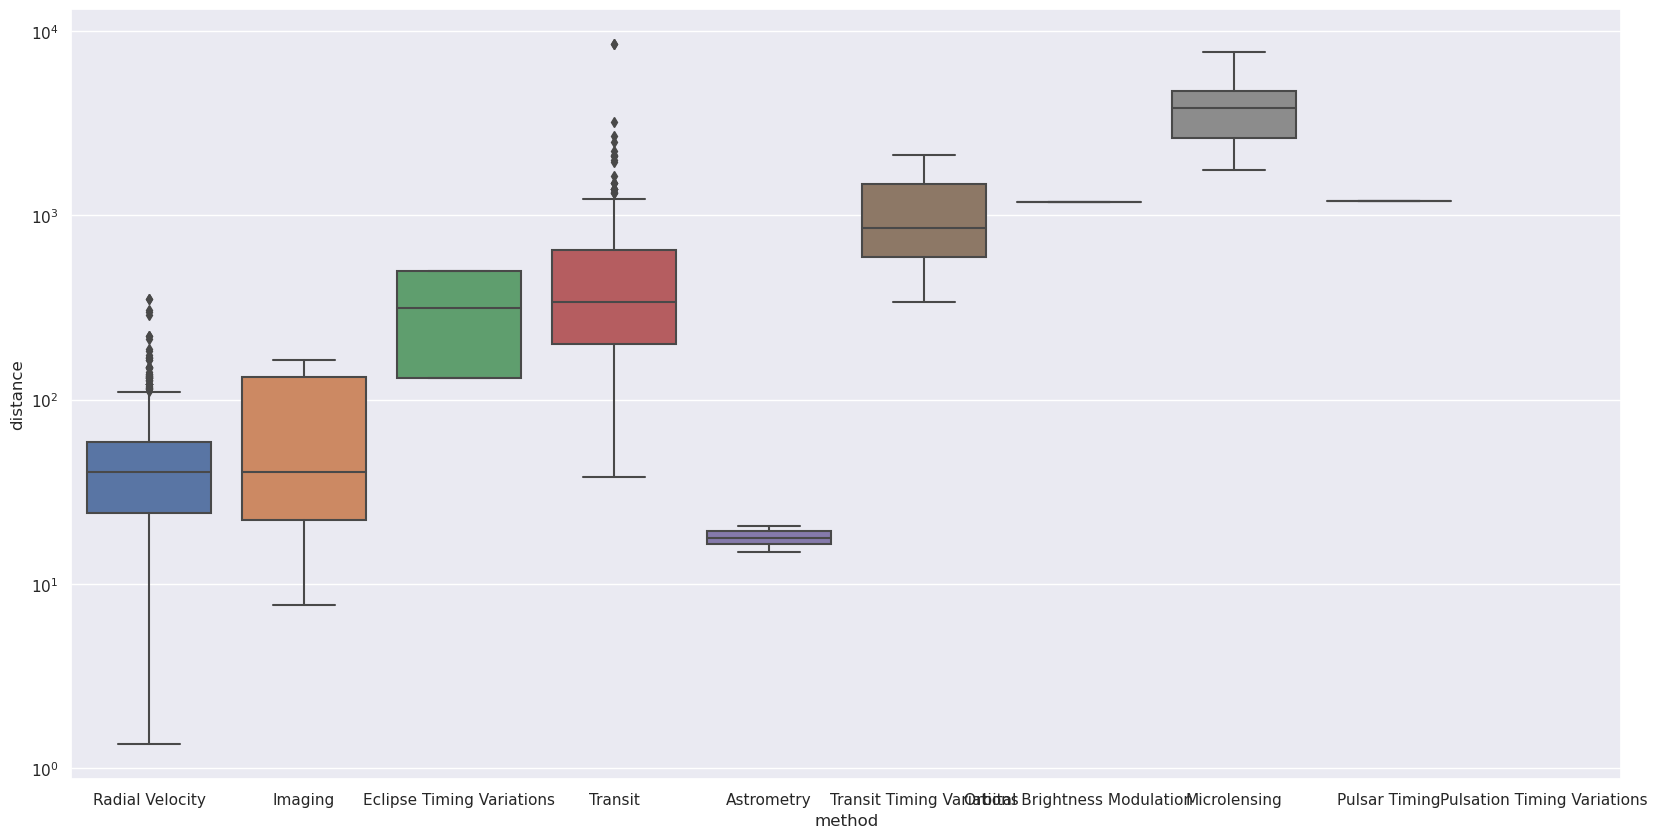

In [13]:
g = sns.boxplot(x='method', y='distance', data=planets)
g.set_yscale('log')